In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
!pip install fpdf
from fpdf import FPDF

!pip install seaborn

import seaborn as sns

#plt.style.use('seaborn')
sns.set_palette("husl")

# just loading datasets
from google.colab import files
import pandas as pd

uploaded = files.upload()

customers_df = pd.read_csv('/content/Customers.csv')
product_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

Saving Transactions.csv to Transactions (1).csv
Saving Customers.csv to Customers (2).csv
Saving Products.csv to Products (1).csv


In [35]:
# data cleaning and prep
def clean_and_prepare_data():
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

    # merging datasets
    df_merged = transactions_df.merge(customers_df, on='CustomerID')
    df_merged = df_merged.merge(product_df, on='ProductID')

    return df_merged

clean_and_prepare_data()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


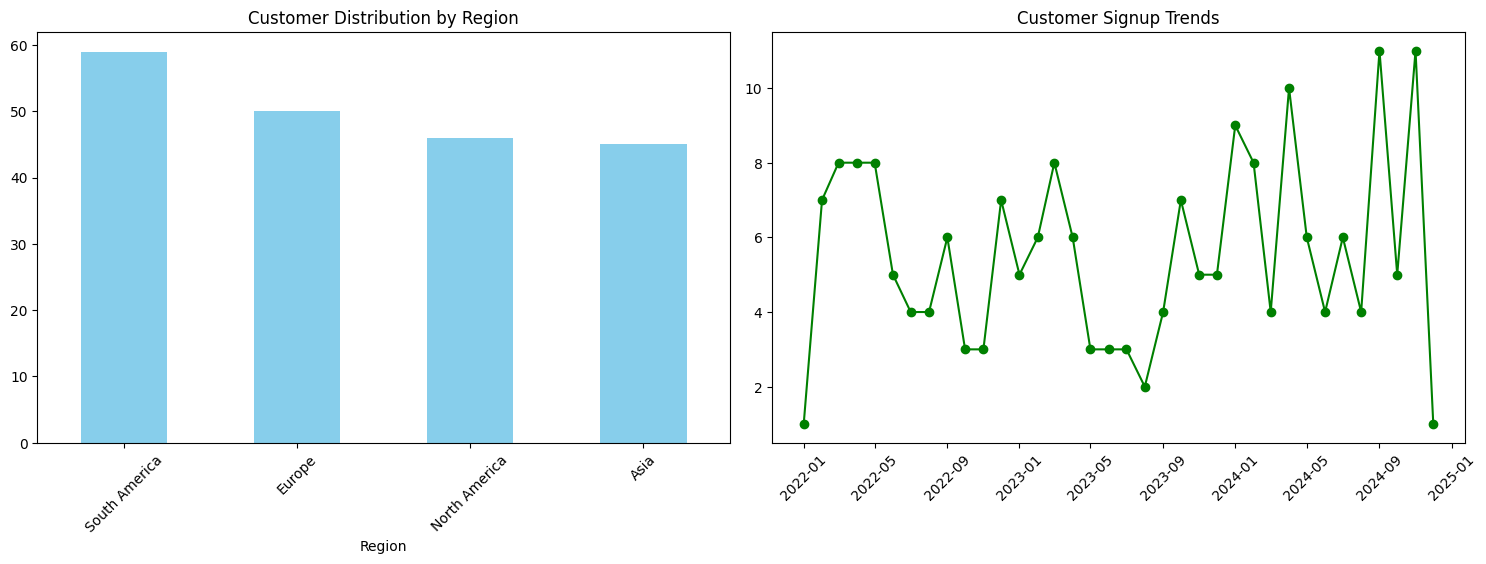

In [54]:
def analyze_customer_demographics(customers_df):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    region_counts = customers_df['Region'].value_counts()
    region_counts.plot(kind='bar', color='skyblue')
    plt.title('Customer Distribution by Region')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])  # Ensure it's a datetime object
    signup_trends = customers_df.groupby(customers_df['SignupDate'].dt.to_period("M")).size().reset_index(name='Count')

    plt.plot(signup_trends['SignupDate'].dt.to_timestamp(), signup_trends['Count'], marker='o', color='green')
    plt.title('Customer Signup Trends')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('demographics_analysis.png')
    plt.show()

analyze_customer_demographics(customers_df)

In [25]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# some basic EDA fxns
def print_basic_info(df, title):
    print(f"\n{title} Dataset Overview:")
    print("-" * 50)
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
    print("\nData Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())

print_basic_info(customers, "Customers")
print_basic_info(products, "Products")
print_basic_info(transactions, "Transactions")


Customers Dataset Overview:
--------------------------------------------------
Shape: (200, 4)

First few rows:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Missing Values:
CustomerID      0
CustomerName    0


In [65]:
print(df_merged.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'SignupYear', 'SignupMonth', 'ProductName', 'Category',
       'Price_y', 'YearMonth'],
      dtype='object')


<ipython-input-57-94007a3793f3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=products_df, x='Category', y='Price', palette='pastel')


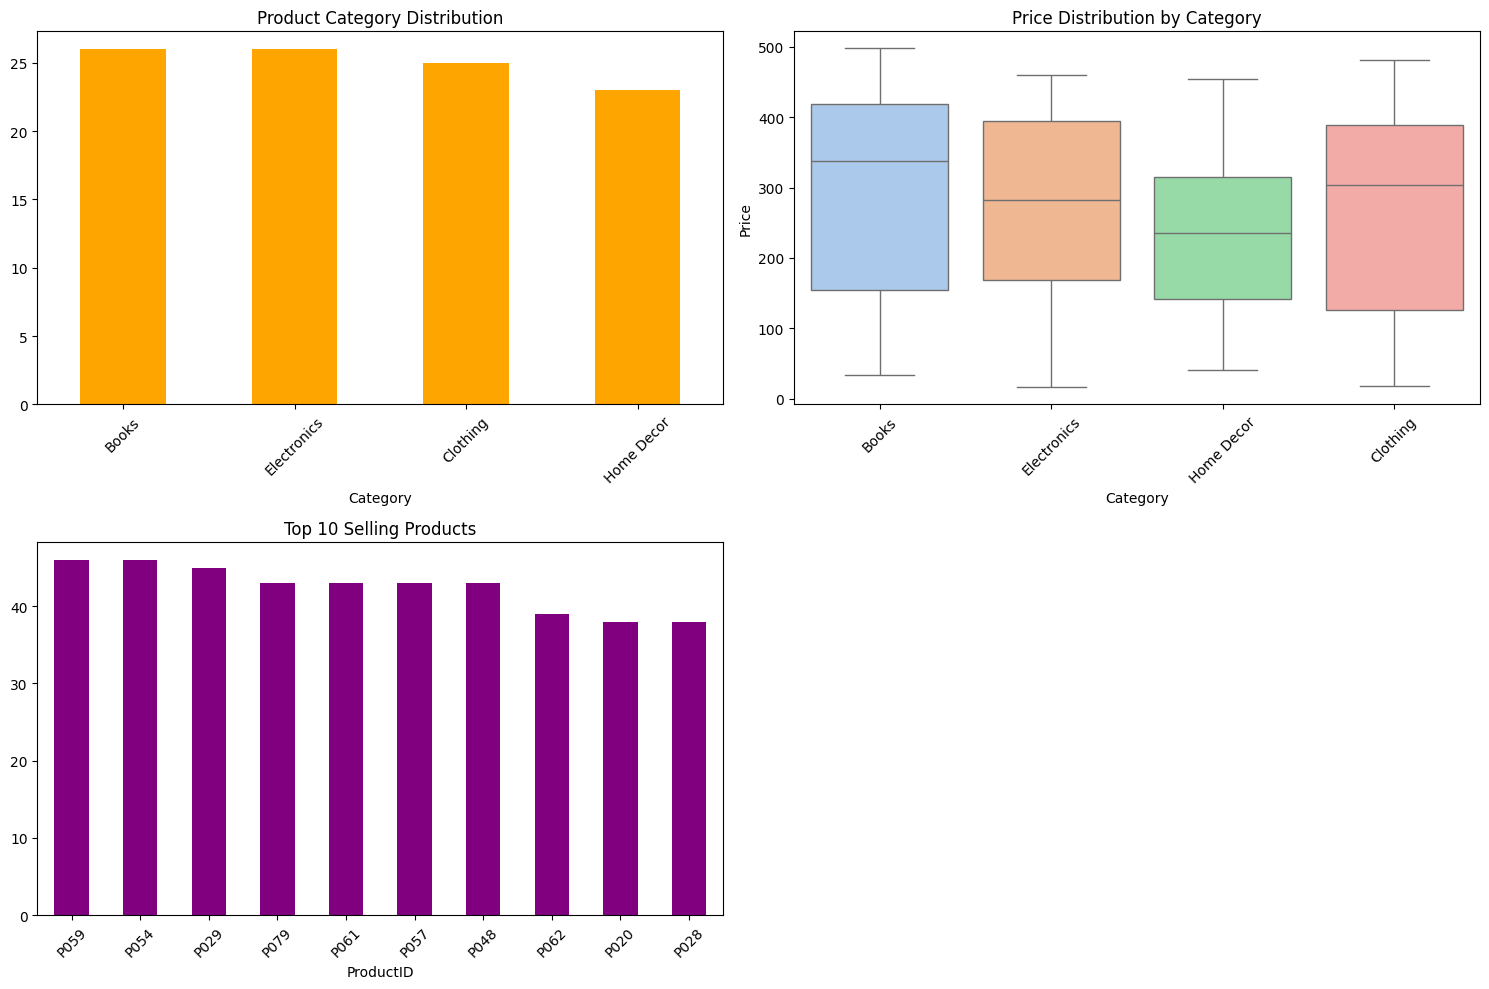

In [57]:
# product analysis
def analyze_products(products_df, transactions_df):
    plt.figure(figsize=(15, 10))

    # category distribution
    plt.subplot(2, 2, 1)
    products_df['Category'].value_counts().plot(kind='bar', color='orange')
    plt.title('Product Category Distribution')
    plt.xticks(rotation=45)

    # price distribution by category
    plt.subplot(2, 2, 2)
    sns.boxplot(data=products_df, x='Category', y='Price', palette='pastel')
    plt.title('Price Distribution by Category')
    plt.xticks(rotation=45)

    # top selling products
    plt.subplot(2, 2, 3)
    top_products = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
    top_products.plot(kind='bar', color='purple')
    plt.title('Top 10 Selling Products')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('product_analysis.png')
    plt.show()

analyze_products(product_df, transactions_df)

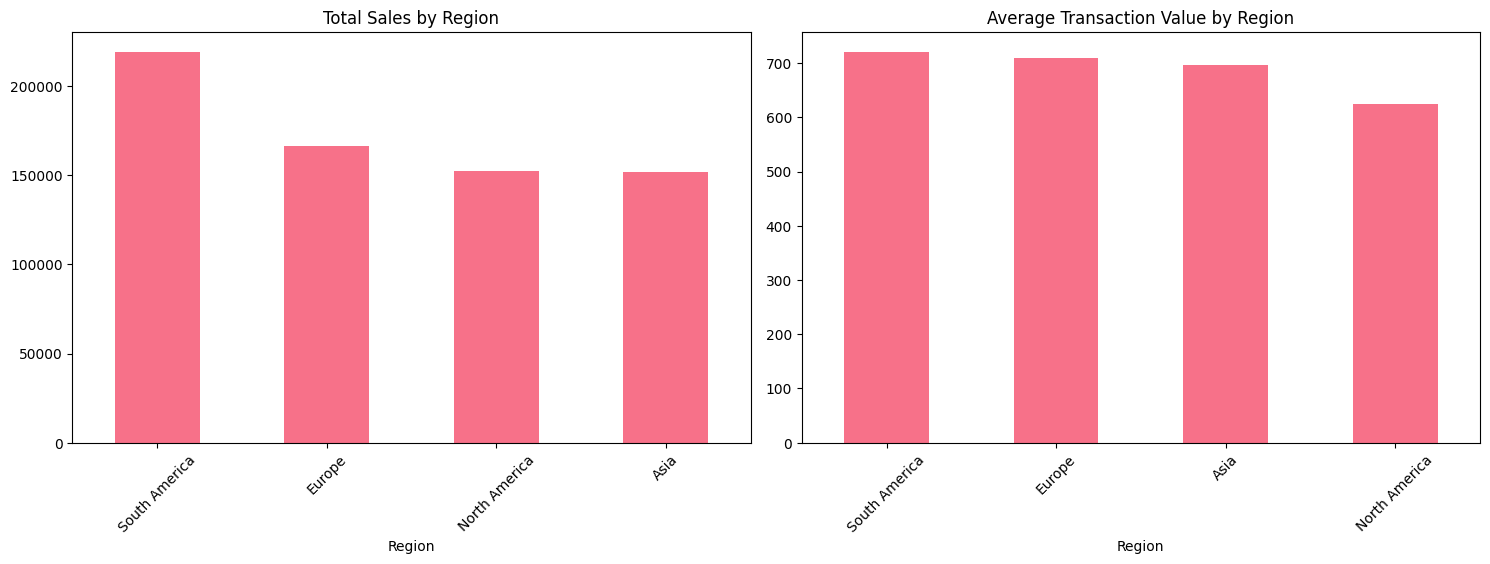

In [60]:
# regional analysis
def analyze_regional_patterns(df_merged):
    plt.figure(figsize=(15, 10))

    # sales by region
    plt.subplot(2, 2, 1)
    region_sales = df_merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
    region_sales.plot(kind='bar')
    plt.title('Total Sales by Region')
    plt.xticks(rotation=45)

    # average transaction value by region
    plt.subplot(2, 2, 2)
    avg_transaction = df_merged.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
    avg_transaction.plot(kind='bar')
    plt.title('Average Transaction Value by Region')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('regional_analysis.png')
    plt.show()

analyze_regional_patterns(df_merged)

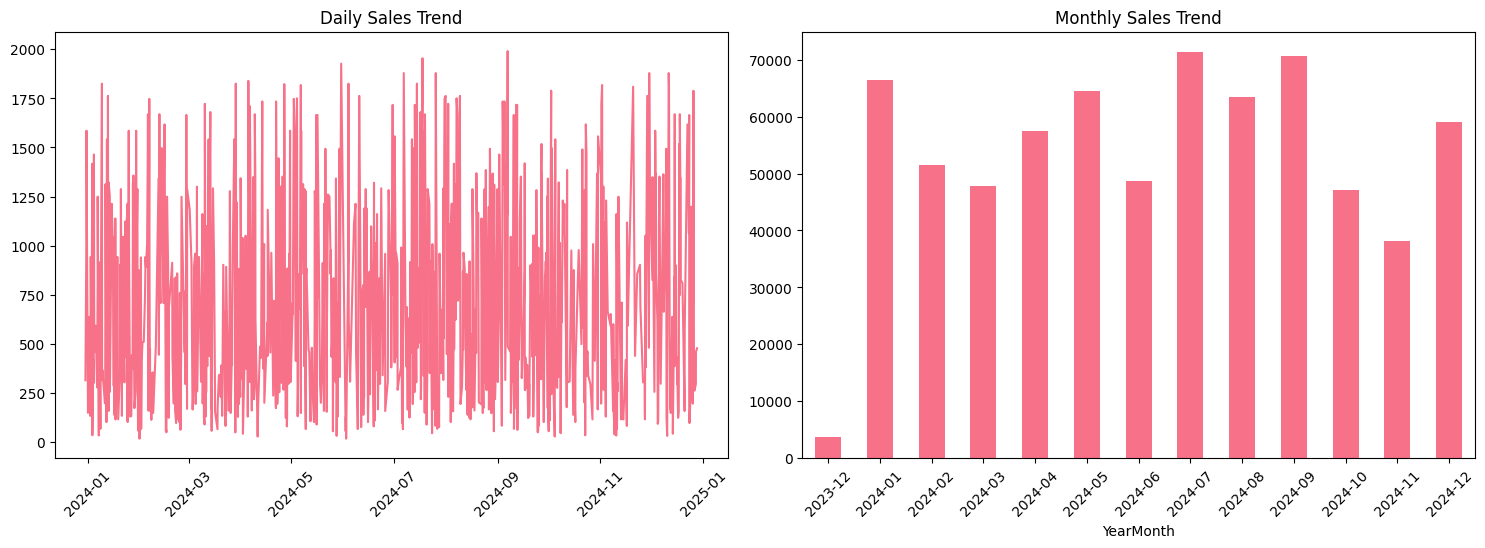

In [61]:
# temporal analysis
def analyze_temporal_patterns(df_merged):
    plt.figure(figsize=(15, 10))

    # daily sales trend
    plt.subplot(2, 2, 1)
    daily_sales = df_merged.groupby('TransactionDate')['TotalValue'].sum().reset_index()
    plt.plot(daily_sales['TransactionDate'], daily_sales['TotalValue'])
    plt.title('Daily Sales Trend')
    plt.xticks(rotation=45)

    # monthly sales trend
    plt.subplot(2, 2, 2)
    df_merged['YearMonth'] = df_merged['TransactionDate'].dt.to_period('M')
    monthly_sales = df_merged.groupby('YearMonth')['TotalValue'].sum()
    monthly_sales.plot(kind='bar')
    plt.title('Monthly Sales Trend')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('temporal_analysis.png')
    plt.show()

analyze_temporal_patterns(df_merged)